In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline 
from scipy.signal import savgol_filter

In [2]:
# VARIABLES
times = np.linspace(0, 1., 10000) # time points
w_num = 5
window = 5
w_zero = np.array([0]) # list of brownian motion values

In [3]:
delta_t = times[1] - times[0]
inc = np.random.normal(size = (len(times) - 1), scale = np.sqrt(delta_t))
w = np.concatenate((w_zero, np.cumsum(inc)))
w_smooth = savgol_filter(w, 500, 3, axis = 0)

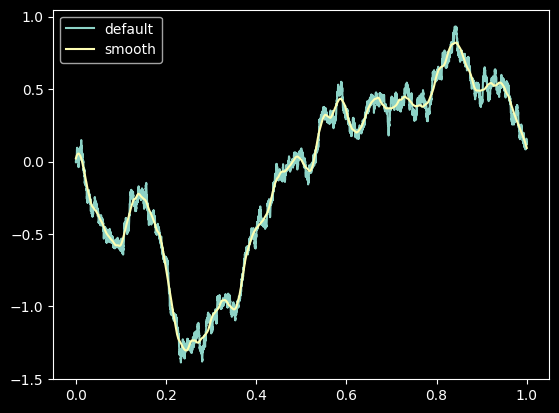

In [4]:
plt.plot(times, w, label = 'default')
plt.plot(times, w_smooth, label = "smooth")
plt.legend()

In [5]:
# VARIABLES
times = np.linspace(0, 1., 10000) # time points
w_num = 5
window = 5
w_init = np.array([[1.5, 0.5, -0.5, -2], ]) # list of brownian motion values

In [6]:
delta_t = times[1] - times[0]
inc = np.random.normal(size = (len(times) - 1, 4), scale = np.sqrt(delta_t))
w = np.concatenate((w_init, np.cumsum(inc, axis = 0)), axis = 0)
w_smooth = savgol_filter(w, 500, 3, axis = 0) 

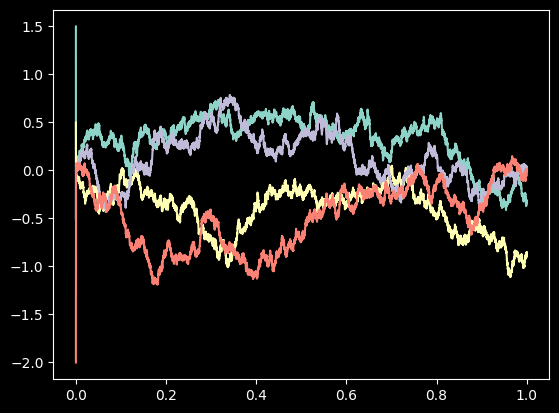

In [7]:
plt.plot(times, w)

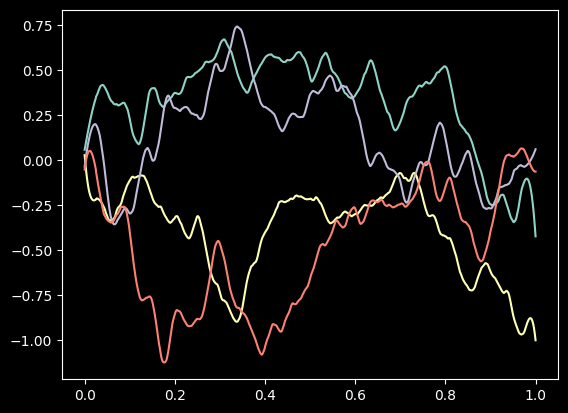

In [8]:
plt.plot(times, w_smooth)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   1.,   0.,   1.,
           2.,   1.,   6.,   4.,   4.,  10.,   5.,   7.,  14.,  18.,  20.,
          19.,  21.,  27.,  40.,  42.,  44.,  55.,  77.,  71.,  80., 112.,
         106., 126., 151., 150., 154., 188., 229., 227., 257., 245., 256.,
         283., 289., 314., 324., 330., 318., 335., 351., 316., 333., 311.,
         249., 302., 271., 285., 272., 250., 237., 206., 212., 167., 167.,
         145., 136., 116., 106., 105.,  84.,  71.,  66.,  41.,  44.,  37.,
          34.,  24.,  19.,  15.,  10.,  11.,  12.,   8.,   7.,   2.,   3.,
           3.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
           0.,   1.,   3.,   2.,   3.,   4.,   7.,  14.,  18.,  16.,  21.,
          16.,  24.,  23.,  38.,  39.,  47.,  64.,  79.,  88.,  81., 109.,
         115., 142., 156., 147., 171., 209., 185., 231., 240., 264., 276.,
         

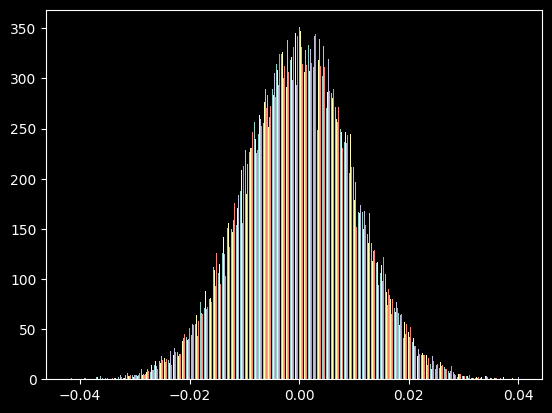

In [9]:
plt.hist(inc, bins = 100)

In [10]:
prob = 0.0005
w_list = [[0.0]]  

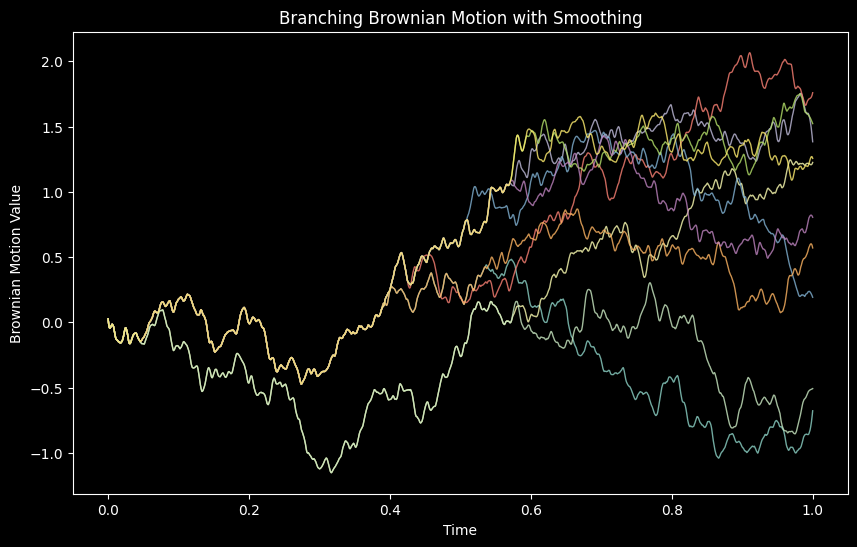

In [11]:
for step in range(1, len(times)):
    new_branches = []
    for w in w_list:
        new_val = w[-1] + np.random.normal(scale = np.sqrt(delta_t))
        w.append(new_val)
        # condition for branching
        if np.random.rand() < prob:
            new_branches.append(w.copy())
    w_list.extend(new_branches)

num_to_plot = min(10, len(w_list))
plt.figure(figsize = (10, 6))
for i in range(num_to_plot):
    path = np.array(w_list[i])
    smoothed_path = savgol_filter(path, window_length = 100, polyorder = 3)
    plt.plot(times, smoothed_path, lw = 1, alpha = 0.8)
plt.xlabel("Time")
plt.ylabel("Brownian Motion Value")
plt.title("Branching Brownian Motion with Smoothing")
plt.show()

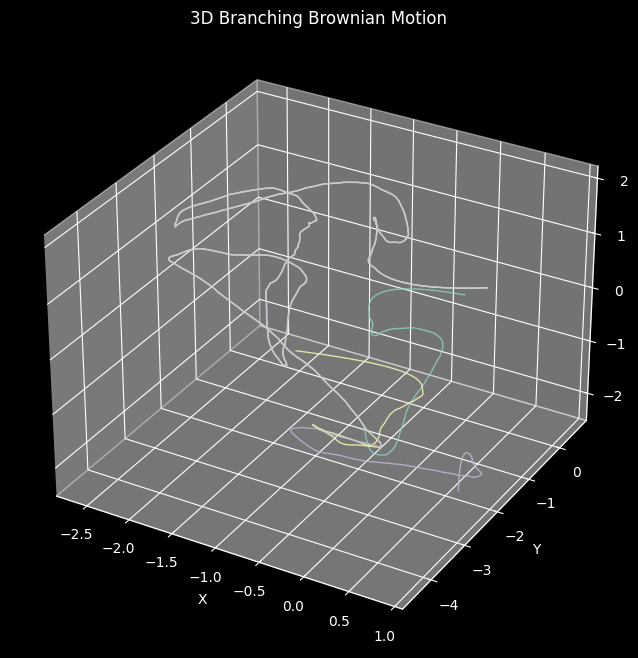

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter

# PARAMETERS
t_total = 10            # Total simulation time
delta_t = 0.01    # Time step
num_steps = int(t_total / delta_t)
times = np.linspace(0, t_total, num_steps)
prob = 0.001

w_list = [[np.array([0.0, 0.0, 0.0])]]

for step in range(1, num_steps):
    new_branches = []
    for w in w_list:
        new_point = w[-1] + np.random.normal(scale = np.sqrt(delta_t), size = 3)
        w.append(new_point)
        # Condition for branching
        if np.random.rand() < prob:
            new_branches.append(w.copy())
    w_list.extend(new_branches)

num_to_plot = min(10, len(w_list))
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')

for i in range(num_to_plot):
    path = np.array(w_list[i])
    if len(path) >= 101:
        window_length = 101
    else:
        window_length = len(path) if len(path) % 2 == 1 else len(path) - 1
        
    if window_length < 3:
        smoothed_x = path[:, 0]
        smoothed_y = path[:, 1]
        smoothed_z = path[:, 2]
    else:
        smoothed_x = savgol_filter(path[:, 0], window_length = window_length, polyorder = 3)
        smoothed_y = savgol_filter(path[:, 1], window_length = window_length, polyorder = 3)
        smoothed_z = savgol_filter(path[:, 2], window_length = window_length, polyorder = 3)
    
    ax.plot(smoothed_x, smoothed_y, smoothed_z, lw =1, alpha = 0.8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Branching Brownian Motion")
plt.show()